# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results =pd.merge(study_results, mouse_metadata, how ="left",on = "Mouse ID")

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = mouse_study_results.loc[mouse_study_results.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = mouse_study_results.loc[mouse_study_results['Mouse ID']=='g989']
duplicate_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_results = mouse_study_results[mouse_study_results['Mouse ID'].isin(duplicate_mouse_id) == False]
clean_mouse_study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_results["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
Mean = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Variance = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
StandardDeviation = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics = pd.DataFrame({"Mean Tumor Volume": Mean, "Median Tumor Volume": Median, "Tumor Volume Variance": Variance, "Tumor Volume Std. Dev.":StandardDeviation, "Tumor Volume Std. Err.":SEM})
summary_statistics.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics_advanced = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_mouse_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean", Median="median", Variance="var", Std_Dev="std", SEM="sem"
)

# Display the result
summary_statistics_advanced

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

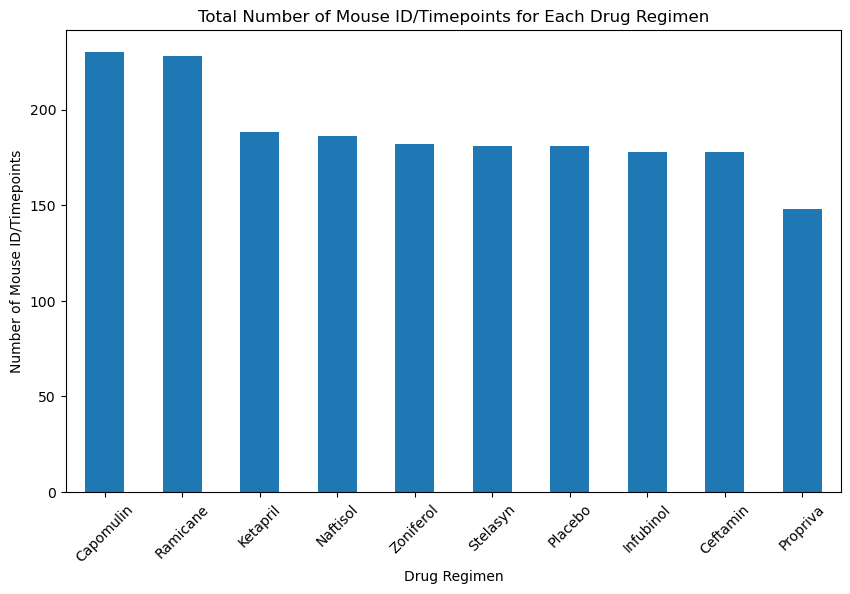

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_mouse_study_results["Drug Regimen"].value_counts()

# Plotting the bar chart
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.show()


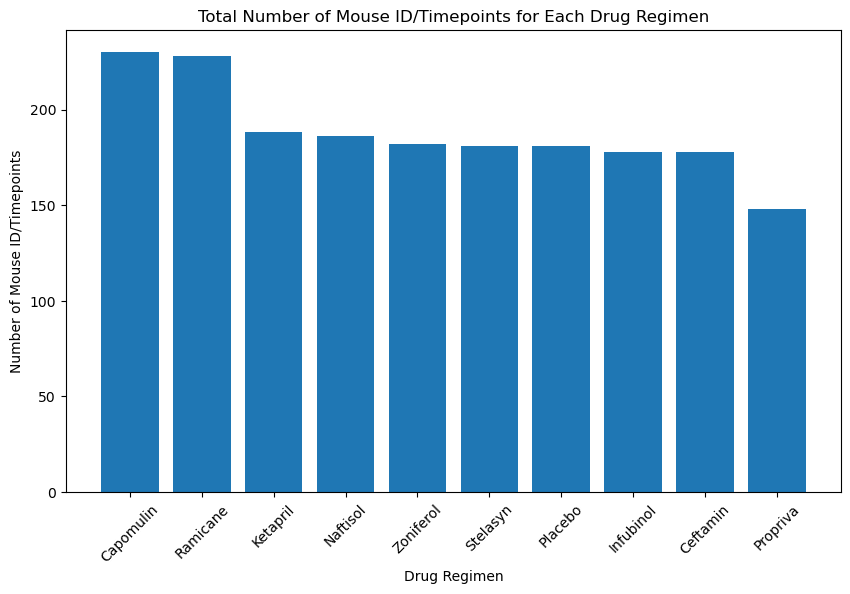

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Count the total number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_counts = clean_mouse_study_results["Drug Regimen"].value_counts()

# Generate the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)

# Add titles and labels
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.show()

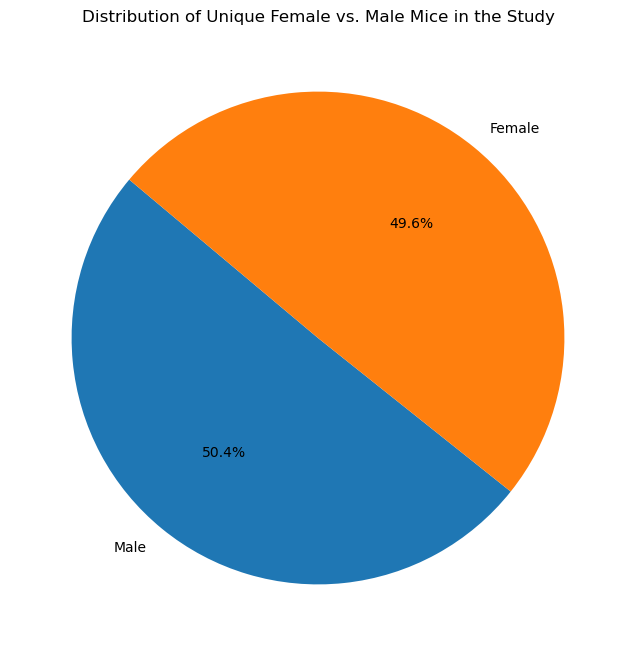

In [13]:
# Get the unique mice with their gender
unique_mice_gender = clean_mouse_study_results.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Generate the pie chart using Pandas
unique_mice_gender.plot(kind='pie', autopct="%1.1f%%", figsize=(8, 8), startangle=140)

# Adding title
plt.title("Distribution of Unique Female vs. Male Mice in the Study")
plt.ylabel("")  # Removing y-label for cleaner appearance
plt.show()

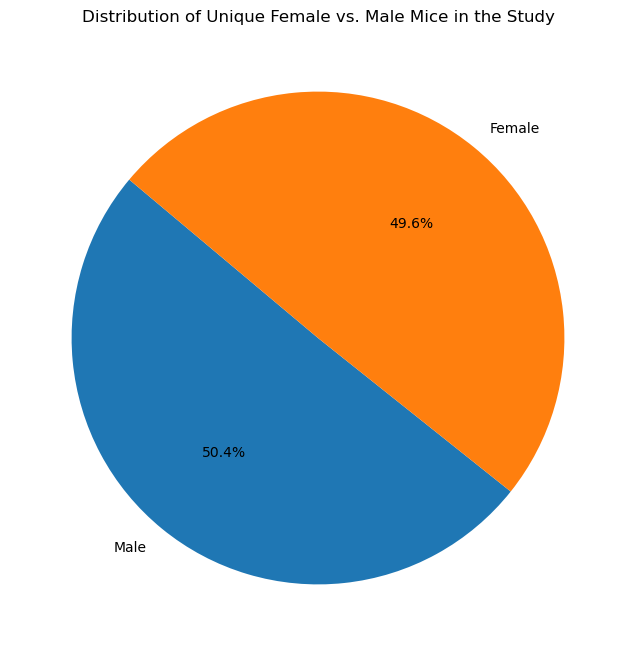

In [14]:
import matplotlib.pyplot as plt

# Get the unique mice with their gender
unique_mice_gender = clean_mouse_study_results.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(unique_mice_gender.values, labels=unique_mice_gender.index, autopct="%1.1f%%", startangle=140)

# Adding title
plt.title("Distribution of Unique Female vs. Male Mice in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_filter = clean_mouse_study_results["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
filtered_data = clean_mouse_study_results[treatment_filter]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_mouse_study_results, on=["Mouse ID", "Timepoint"], how="left")

# Display the result
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [19]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each treatment to calculate IQR and determine outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Append this data subset to the tumor_vol_data list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the outlier bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify any potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print out the results for each treatment
    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


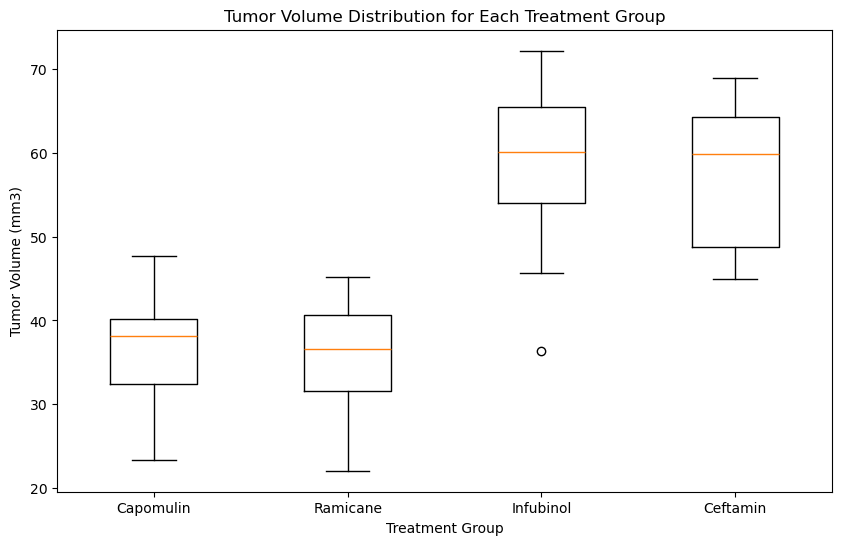

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Adding titles and labels
plt.title("Tumor Volume Distribution for Each Treatment Group")
plt.xlabel("Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

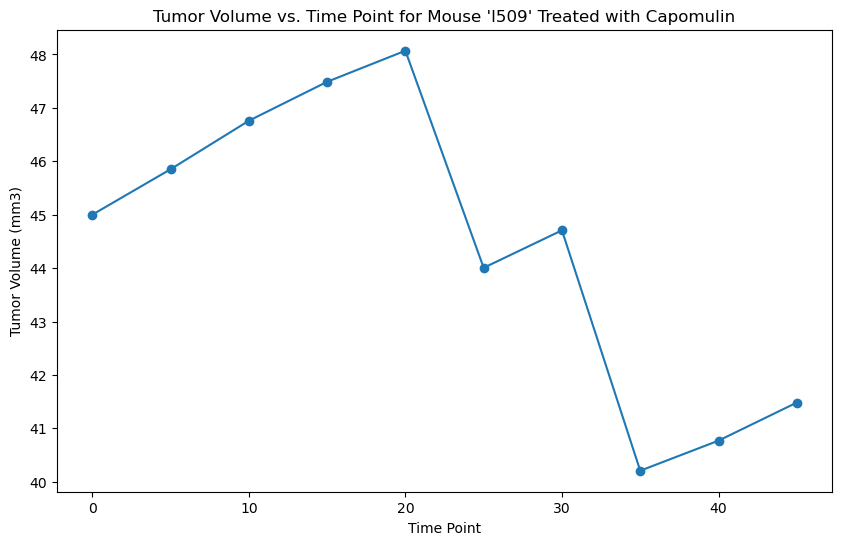

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for a single mouse treated with Capomulin (e.g., mouse ID 'l509' as an example)
single_mouse_data = clean_mouse_study_results[(clean_mouse_study_results["Drug Regimen"] == "Capomulin") & 
                                              (clean_mouse_study_results["Mouse ID"] == "l509")]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o')

# Adding titles and labels
plt.title("Tumor Volume vs. Time Point for Mouse 'l509' Treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


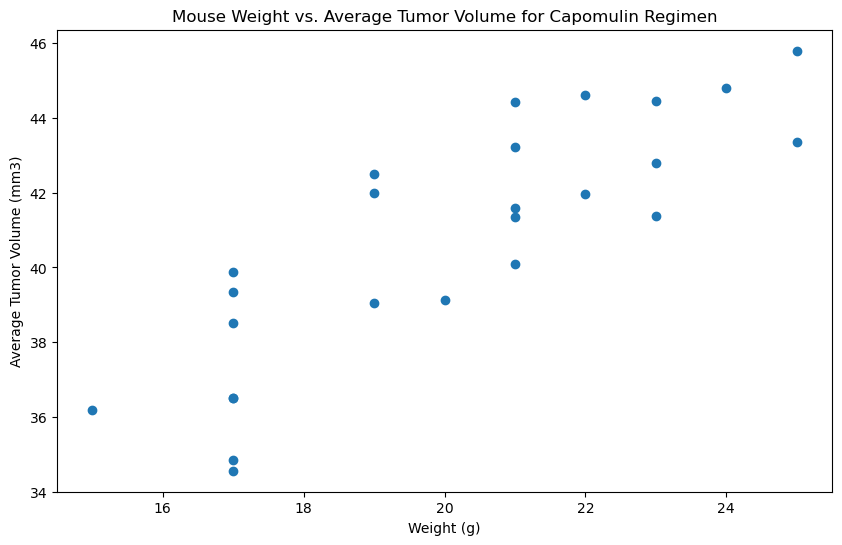

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for the Capomulin regimen
capomulin_data = clean_mouse_study_results[clean_mouse_study_results["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume)

# Adding titles and labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


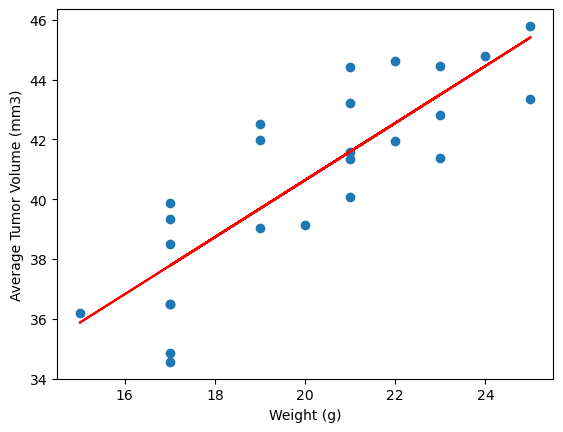

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722


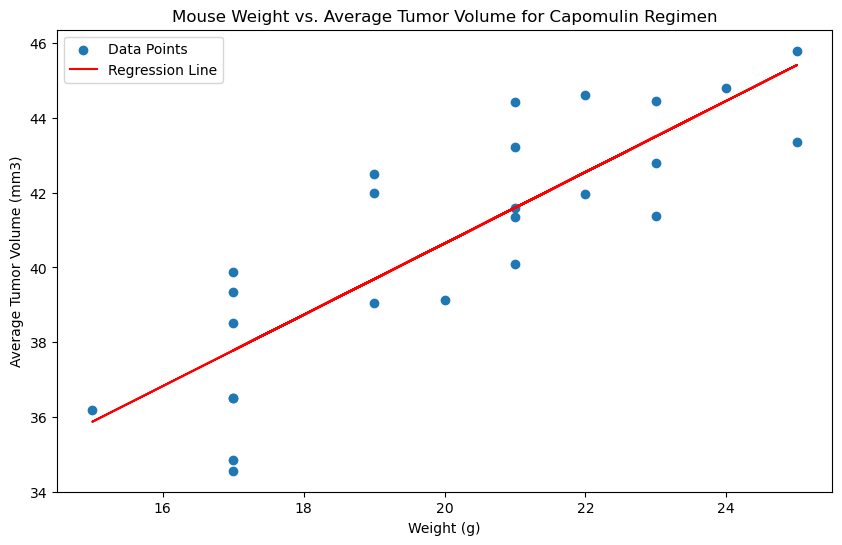

Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


In [23]:
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = mouse_weight.corr(avg_tumor_volume)
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

# Generate values for the regression line
regression_values = slope * mouse_weight + intercept

# Plotting the scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, label="Data Points")
plt.plot(mouse_weight, regression_values, color="red", label="Regression Line")

# Adding titles and labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()

# Print the linear regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
